<a href="https://colab.research.google.com/github/dgsob/SF2526-VT25/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Install Jullia, then reload

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.11.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.11.2 on the current Colab Runtime...
2025-01-21 16:41:12 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.11/julia-1.11.2-linux-x86_64.tar.gz [285843560/285843560] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.11

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Homework 1

## Exercise 1

"We shall investigate Gram-Schmidt by column elimination (Algo-
rithm 1 in EJ1)."

### Part (a)

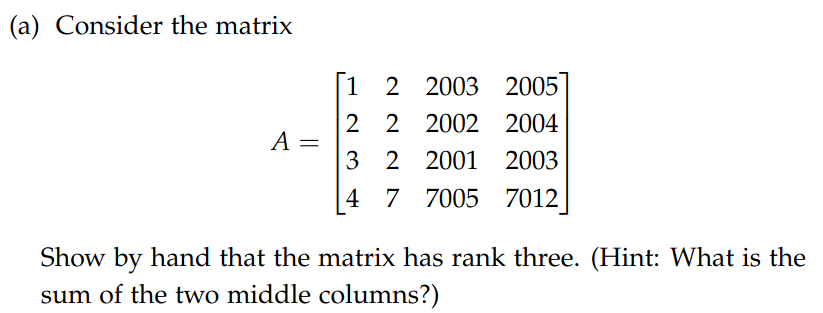

The sum of middle columns (Column 2 and Column 3) equal Column 4:

$
Column 2 + Column 3 =
\begin{bmatrix}
2 \\ 2 \\ 2 \\ 7
\end{bmatrix}
+
\begin{bmatrix}
2003 \\ 2002 \\ 2001 \\ 7005
\end{bmatrix}
=
\begin{bmatrix}
2 + 2003 \\ 2 + 2002 \\ 2 + 2001 \\ 7 + 7005
\end{bmatrix}
=
\begin{bmatrix}
2005 \\ 2004 \\ 2003 \\ 7012
\end{bmatrix}
= Column 4
$

This shows that column 4 is linearly dependent on columns 2 and 3, and thus the matrix has rank at most 3.

Next, we will calculate $det(B)$ where $B$ is a minor of matrix $A$ of order 3, e.g.:

$B =
\begin{bmatrix}
2 & 2 & 2002 \\
3 & 2 & 2001 \\
4 & 7 & 7005
\end{bmatrix}
$

If there exists any maximum possible order non-zero minor then rank of $A$ equals order of that particular minor.

Thus, if $det(B) \neq 0$, then rank of $A$ equals 3.
$det(B) = 2*2*7005 + 2*2001*4 + 2002*3*7 - 2002*2*4 - 2*3*7005 - 2*2001*7 = 10 \neq 0$